In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidental-analysis')
jovian.set_colab_id('1QfVIWX3xg8btKn1wC0N8DNz2ZyU7VQWa')


     |████████████████████████████████| 68 kB 4.3 MB/s 


# us-accidental-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidental-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/temitopeyakub28/us-accidental-analysis


'https://jovian.ai/temitopeyakub28/us-accidental-analysis'

In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od


In [ ]:
dataset_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: temitopeyakub
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:04<00:00, 62.9MB/s]


In [ ]:
us_data = "./content/us-accidents/US_Accidents_Dec20_Updated.csv"


In [ ]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization
%matplotlib inline
sns.set()


In [25]:

df = pd.read_csv("/content/us-accidents/US_Accidents_Dec20_Updated.csv")
df.head(2)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.tail() #TO DISPLAY THE BOOTOM FIVE ROWS 


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906609,A-2906610,2,2018-03-26 13:35:03,2018-03-26 14:39:00,38.831749,-104.748161,38.831749,-104.748161,0.000,Accident on Murray Blvd at Byron Dr.,NaN,Byron Dr,R,Colorado Springs,El Paso,CO,80916,US,US/Mountain,KCOS,2018-03-26 13:54:00,51.1,NaN,38.0,29.77,10.0,SE,13.8,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.columns  #TO CHECK THE HEADERS IF IT IS WELL WRITTEN



Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()  #TO GET THE SUMMARY OP THE DATATFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     


From the above code, we have 3 major dtypes--- We need to change some, and we need to create new dtypes


In [ ]:
df.shape  #TO GET THE DIMENSIONS OF THE DATAFRAME

(2906610, 47)


From the above code, we have 2906610 rows and 47 columns(features)

In [ ]:

#Check the describtion of the numeric features
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
#Checking for the number of each data type----
df_numeric = df.select_dtypes(include='number') # extract columns with number
num = len(df_numeric.columns) # sum the columns extracted
print(f'We have {num} numeric columns') #format string

df_obj = df.select_dtypes(include='object')
num_2 = len(df_obj.columns)
print(f'we have {num_2} object columns')

df_bool = df.select_dtypes(include='bool')
num_3 = len(df_bool.columns)
print(f'we have {num_3} boolean columns')

print(f'With a total number of {num + num_2 + num_3} columns')

We have 14 numeric columns
we have 20 object columns
we have 13 boolean columns
With a total number of 47 columns


In [ ]:
df_numeric.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [ ]:
#To replce empty cell to NAN
# df.replace(r'^\s*$', np.nan, regex=True) 


In [ ]:
#To check if there is missing data in the datframe
df.isnull().values.any() 

True

From the above code we can see there are missing data in the dataframe. We need to find percentage of missing data and drop all neccesary columns>

In [ ]:
#Checking for the percentage of the missing data

#creating a dataframe for percebtage of missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((df.isnull().sum()/len(df.index)) * 100,2)}) 
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data.head(5)


,Percentage of Missing of Data
Number,65.08
Precipitation(in),44.77
Wind_Chill(F),40.73
Wind_Speed(mph),10.57
End_Lat,9.73










*   65% of Number are missing. That means we can't really get any insight from it.

*   44.8% of Precipitation is missing. We can work with that. We will have to come up with a way to fill the missing data up. Precipitation can't be ignored.


*  We are just going to drop Number













In [ ]:
df_obj.head(2)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,N,Fair,Day,Day,Day,Day
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,VAR,Cloudy,Day,Day,Day,Day



From the above datframe, these are my observations to note
*   

*   The date need to change to date type(dtype)

*  The categorical data need to  change  to categorical type(dtype)


*   The description column is not needed




*  The city is not needed beacuse the Country is located in the State. Let's stick with State.

*   The street is needed too. 



*   The country is not neeeded beacuse US is the only items in the Country.

*   The zipcode is not needed beacause they represent each state










In [ ]:
#Checking to see the unique  items in Side
print(df.Side.unique())
print(f'Total number of sides: {len(df.Side.unique())}')

['R' 'L' ' ']
Total number of sides: 3


From the observation above, we have empty cell as the items. We should replece it with NAN values. 

In [ ]:
#checking to see the  uniques States 
print(df.State.unique())
print(f"The total number of States: {len(df.State.unique())}")

['SC' 'NC' 'CA' 'NV' 'FL' 'CO' 'TN' 'NY' 'TX' 'AZ' 'NJ' 'MI' 'GA' 'VA'
 'IN' 'LA' 'PA' 'MN' 'OH' 'MD' 'CT' 'IL' 'MO' 'OR' 'NE' 'OK' 'UT' 'WA'
 'AL' 'WI' 'MA' 'DC' 'MS' 'KS' 'KY' 'ME' 'IA' 'WV' 'AR' 'ID' 'RI' 'WY'
 'NM' 'MT' 'NH' 'DE' 'ND' 'SD' 'VT']
The total number of States: 49


In [ ]:
#Checking itmes in Timezones. Take note of categorical data
print(df.Timezone.unique())
print(f"The total number of Timezones is {len(df.Timezone.unique())}")

['US/Eastern' 'US/Pacific' 'US/Mountain' 'US/Central' nan]
The total number of Timezones is 5


In [ ]:
#Checking to see the Airport Code
print(df.Airport_Code.unique())
print(f'The total number of Airport: {len(df.Airport_Code.unique())}')

['KGMU' 'KEQY' 'KSJC' ... 'KCOM' 'KSIB' 'KGUY']
The total number of Airport: 2014


In [ ]:
#Checking for unique  Wind_Direction
print(df.Wind_Direction.unique())
print(f"Total number of Wind_Direction is {len(df.Wind_Direction.unique())}")

['N' 'VAR' 'W' 'SSW' 'SSE' 'NNW' 'NE' 'E' 'West' 'S' 'Variable' 'WSW' 'SW'
 'ESE' 'South' 'ENE' 'Calm' 'NNE' 'CALM' 'NW' 'East' 'North' 'WNW' 'SE'
 nan]
Total number of Wind_Direction is 25


In [ ]:
#Checking for unique weather conditions
print(df.Weather_Condition.unique())
print(f'The total number of weather condition is {len(df.Weather_Condition.unique())}')

['Fair' 'Cloudy' 'Clear' 'Overcast' 'Light Snow' 'Mostly Cloudy'
 'Partly Cloudy' 'Scattered Clouds' 'Wintry Mix' 'Shallow Fog' 'Fog'
 'Haze' nan 'Light Rain' 'Smoke' 'Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy Snow' 'Snow' 'Thunderstorm' 'Light Rain Shower' 'Heavy Rain'
 'Mist' 'Thunderstorms and Rain' 'Fair / Windy' 'Light Freezing Rain'
 'Light Thunderstorms and Rain' 'Light Snow / Windy'
 'Thunder in the Vicinity' 'Drizzle' 'Rain / Windy' 'Thunder'
 'Drizzle and Fog' 'Heavy Thunderstorms and Rain' 'T-Storm'
 'Light Rain with Thunder' 'Partly Cloudy / Windy' 'Patches of Fog'
 'Mostly Cloudy / Windy' 'Haze / Windy' 'Heavy T-Storm'
 'Light Rain / Windy' 'Blowing Snow' 'Light Freezing Fog'
 'Light Freezing Drizzle' 'Small Hail' 'Widespread Dust' 'Heavy Drizzle'
 'Heavy Rain / Windy' 'Heavy T-Storm / Windy' 'Snow / Windy'
 'Light Blowing Snow' 'Showers in the Vicinity' 'Fog / Windy' 'Sleet'
 'Light Ice Pellets' 'Blowing Dust / Windy' 'Smoke / Windy'
 'T-Storm / Windy' 'Ice Pellets' 


# COLUMNS FOR TWILIGHT & SUNSET
Since the columns for twighlt, together with Sunset have the same items(Day & Night), I have to check for the correlation to see if they are highly corrrelated or not.

In [ ]:
#Checking for how they correlate
twilight = df[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']]
twilight.head(3)

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Day,Day,Day,Day
1,Day,Day,Day,Day
2,Night,Night,Night,Night


From the above table, from the glance look, day is consistent in all columns and Night is the same. Note, that's not enough to conclude. We don't have the total look of the dataset. One way to go about this is to change it to numbers and find the correlation.



In [ ]:
#getting the dummies  for each data point
twilight = pd.get_dummies(twilight)

In [ ]:
twilight

,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0,1
3,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
2906605,1,0,1,0,1,0,1,0
2906606,0,1,0,1,0,1,0,1
2906607,1,0,1,0,1,0,1,0
2906608,0,1,0,1,0,1,0,1


After changing it to numbers, Let's create a dataframe for day and night.

In [ ]:
# A dataframe for day only
twilight_day = twilight[['Sunrise_Sunset_Day','Civil_Twilight_Day','Nautical_Twilight_Day','Astronomical_Twilight_Day']]
twilight_day.head(5)

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


In [ ]:
# A dataframe for night  only
twilight_night = twilight[['Sunrise_Sunset_Night','Civil_Twilight_Night','Nautical_Twilight_Night','Astronomical_Twilight_Night']]
twilight_night.head(5)

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0


In [ ]:
#Checking for day correlation
twilight_day = twilight_day.corr()
twilight_day

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
Sunrise_Sunset_Day,1.000000,0.898599,0.794332,0.707199
Civil_Twilight_Day,0.898599,1.000000,0.883924,0.787076
Nautical_Twilight_Day,0.794332,0.883924,1.000000,0.890480
Astronomical_Twilight_Day,0.707199,0.787076,0.890480,1.000000


In [ ]:
#Checking for day correlation
twilight_night = twilight_night.corr()
twilight_night

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
Sunrise_Sunset_Night,1.000000,0.898592,0.794317,0.707175
Civil_Twilight_Night,0.898592,1.000000,0.883914,0.787055
Nautical_Twilight_Night,0.794317,0.883914,1.000000,0.890467
Astronomical_Twilight_Night,0.707175,0.787055,0.890467,1.000000


From the above observation, twiliht day and  twilight night shows the items are highly correlated. This means there is a high level that they all predict each other. we can drop all except one that will be used in the analysis.



In [ ]:
df_bool.head(2)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.Turning_Loop.unique())

[False]


I observed the Turning loop column has only one entries(False), which we need to  drop.

In [ ]:
df_numeric.head(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2,34.808868,-82.269157,34.808868,-82.269157,0.0,439.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,2,35.090080,-80.745560,35.090080,-80.745560,0.0,3299.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0


In [ ]:
len(df.ID.unique())

 

2906610

The unique ID represent tne number of accidents in the data set.

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:

#Drop Colums that needs to be dropped. 
df.drop(columns=['Number','Country','Description','City','Zipcode','Turning_Loop','Astronomical_Twilight','Civil_Twilight','Nautical_Twilight'],inplace=True)

In [ ]:
df.drop(columns="County", inplace=True) #The above code didn't drop the country beacuse Country
# is splet as "County". I had to write another code to drop it





*   We are dropping Number because it is more than 50% that is missing

*  We are dropping country because the accidents all happened in the same Country


*  We are dropping Description because we are not working on a NLP project


*  We are dropping Zipcode because they rep each state

*   We are dropping Astronomical_Twilight, Civil_Twilight,Nautical_Twilight because they are highly correlated with sunrise_sunset.... We should use just one of them. They predict each other


*  We are dropping Turning loop beacuse it has only one entry(False).





In [ ]:
df.isnull().any()

ID                       False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description              False
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity                  False
Bump                     False
Crossing

In [ ]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Tanner Rd,R,SC,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Providence Branch Ln,R,NC,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Santa Cruz Hwy,R,CA,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,US Highway 395 S,R,NV,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,I-595 W,R,FL,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,Day


Now, we are going to group the above dataframe  into date, category, numeric and boolean in respect with ID(The ID is the number of accident)

In [26]:
#For the Date DataFrame--- 
date_DataFrame = df[['ID','Start_Time','End_Time','Weather_Timestamp']]

#For the numeric DataFrame---
number_DataFrame = df[['ID',
                       'Start_Lat',
                       'Start_Lng',
                       'End_Lat',
                       'End_Lng',
                       'Distance(mi)',
                       'Temperature(F)',
                       'Wind_Chill(F)',
                       'Humidity(%)',
                       'Pressure(in)',
                       'Visibility(mi)',
                       'Wind_Speed(mph)',
                       'Precipitation(in)']]

#The DataFrame for the categorical Data
Categorical_DataFrame = df[['ID','Side','State','Timezone','Wind_Direction','Weather_Condition','Severity','Sunrise_Sunset']]

#The DataFrame for Boolean Data
bool_DataFrame = df[['ID',
                     'Amenity',
                     'Bump',
                     'Crossing',
                     'Give_Way',
                     'Junction',
                     'No_Exit',
                     'Railway',
                     'Roundabout',
                     'Station',
                     'Stop',
                     'Traffic_Calming',
                     'Traffic_Signal']]
                     

Now, that we have divided the dataframe , let's change the dataframe

In [ ]:
date_DataFrame.head(3)

,ID,Start_Time,End_Time,Weather_Timestamp
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,2019-05-21 08:53:00
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,2019-10-07 17:53:00
2,A-3,2020-12-13 21:53:00,2020-12-13 22:44:00,2020-12-13 21:53:00


In [ ]:
#To check the data type
date_DataFrame.dtypes

ID                   object
Start_Time           object
End_Time             object
Weather_Timestamp    object
dtype: object

Here, the dates are not in date time. We need to change the type of date to a date time object  

In [ ]:
#Transform to datetime obeject
date_DataFrame['Start_Time'] = pd.to_datetime(date_DataFrame['Start_Time'], format='%Y-%m-%d')
date_DataFrame['End_Time'] = pd.to_datetime(date_DataFrame['End_Time'], format='%Y-%m-%d')
date_DataFrame['Weather_Timestamp'] = pd.to_datetime(date_DataFrame['Weather_Timestamp'], format='%Y-%m-%d')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

from the above code, it has changed to date time object

Now, we need to get the year, month, days from the date dataframe

In [ ]:
date_DataFrame["Year"] = date_DataFrame["Start_Time"].dt.year
date_DataFrame['Month'] = date_DataFrame['Start_Time'].dt.month_name()
date_DataFrame['Day'] = date_DataFrame['Start_Time'].dt.day_name()
date_DataFrame['Hour'] = date_DataFrame['Start_Time'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
date_DataFrame.head(3
                    )

,ID,Start_Time,End_Time,Weather_Timestamp,Year,Month,Day,Hour
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,2019-05-21 08:53:00,2019,May,Tuesday,8
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,2019-10-07 17:53:00,2019,October,Monday,17
2,A-3,2020-12-13 21:53:00,2020-12-13 22:44:00,2020-12-13 21:53:00,2020,December,Sunday,21


Here, we have extracted the Year, Month, Day, and Hour. We can now drop all neccesary columns we don't need.

In [ ]:
date_DataFrame.drop(columns=["Start_Time", "End_Time", "Weather_Timestamp"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
date_DataFrame.head(2)

,ID,Year,Month,Day,Hour
0,A-1,2019,May,Tuesday,8
1,A-2,2019,October,Monday,17


In [ ]:
date_DataFrame.isnull().values.any()

False

From the above date dataframe, We don't have any missing data again. it showw we have celanse the data.

The Hours when most accidents occured

In [ ]:
# #Hours with the highest number of Accidents
# accidents_by_hour = pd.DataFrame(date_DataFrame.groupby('Hour')['ID'].count())
# accidents_by_hour.reset_index(inplace=True)

In [ ]:
# date_DataFrame.set_index(pd.Index([num for num in range(1, len(date_DataFrame) + 1)]), inplace = True)

In [ ]:
date_DataFrame

,ID,Year,Month,Day,Hour
0,A-1,2019,May,Tuesday,8
1,A-2,2019,October,Monday,17
2,A-3,2020,December,Sunday,21
3,A-4,2018,April,Tuesday,16
4,A-5,2016,August,Wednesday,17
...,...,...,...,...,...
2906605,A-2906606,2018,June,Thursday,8
2906606,A-2906607,2019,January,Thursday,2
2906607,A-2906608,2020,November,Monday,12
2906608,A-2906609,2019,December,Sunday,22


In [ ]:
# #Hours with the highest number of Accidents
accidents_by_hour = pd.DataFrame(date_DataFrame.groupby('Hour')['ID'].count())
accidents_by_hour.reset_index(inplace=True)

In [ ]:
accidents_by_hour.isnull().any()

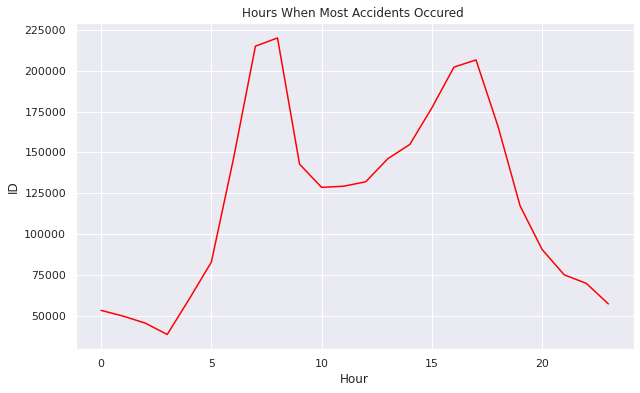

In [ ]:

plt.figure(figsize=(10,6))
sns.lineplot(data=accidents_by_hour, x='Hour', y='ID', color= "red")
plt.title("Hours When Most Accidents Occured ")

plt.show()

From the chart above ,  the peak hours of the accidents are 7 AM, 8 AM, 5 PM, and 6 PM. Nightime(10 PM-5 AM) is the safest time to travel which is showing less number of accidents. This is as a reuslt of people rushing to work in the morning and closing hours of work.

In [ ]:

#Year with the highest number of Accidents
accidents_by_year = pd.DataFrame(date_DataFrame.groupby('Year')['ID'].count())
accidents_by_year.reset_index(inplace=True)

In [ ]:
accidents_by_year

,Year,ID
0,2016,270881
1,2017,448268
2,2018,535921
3,2019,617712
4,2020,1033828


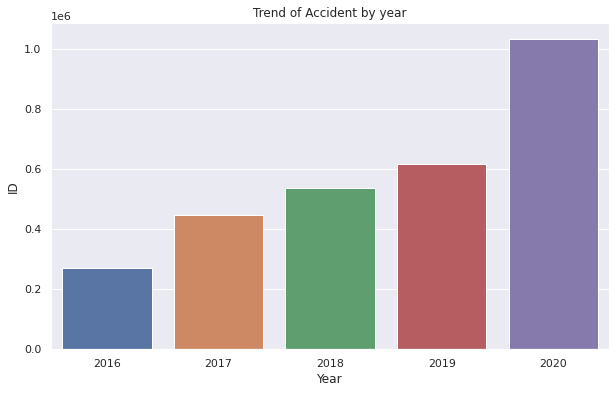

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_year, x='Year', y='ID')
plt.title("Trend of Accident by year")

plt.show()


From the chart above, number of Accidents were lower and showed a more significant change in the early years as compared with those in recent years when the number of accidents has been raised high. Highest number of accidents were recorded in 2020.




In [ ]:
#Months that recorded the highest number of Accidents
accidents_by_month = pd.DataFrame(date_DataFrame.groupby('Month')['ID'].count()).sort_values(by = "ID", ascending= True)

accidents_by_month.reset_index(inplace=True)

In [ ]:
accidents_by_month

,Month,ID
0,July,157112
1,February,186660
2,August,196597
3,March,197969
4,January,198485
5,May,204889
6,April,205487
7,June,214558
8,September,255159
9,October,326430


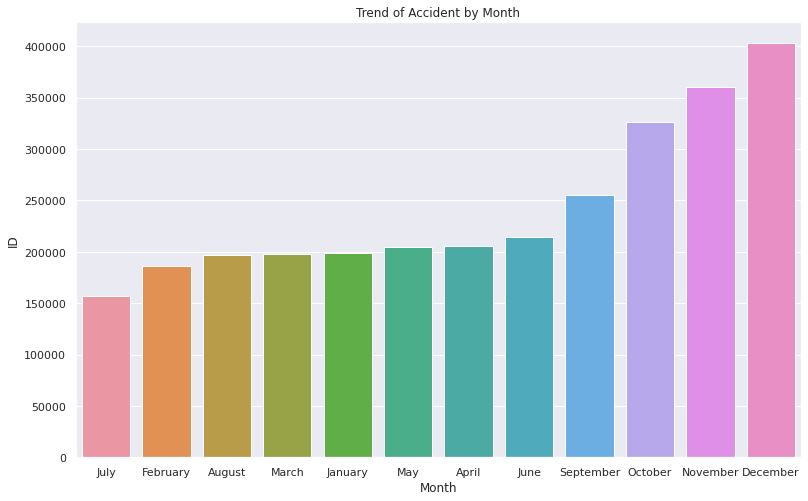

In [ ]:

plt.figure(figsize=(13,8))
sns.barplot(data=accidents_by_month, x='Month', y='ID')
plt.title("Trend of Accident by Month")

plt.show()

From the chart for the month above, Monthly accidents increase steadily from September-December. First half showing a smaller number of accidents compared to the second half of the year.

In [ ]:
#Months that recorded the highest number of Accidents
accidents_by_day = pd.DataFrame(date_DataFrame.groupby('Day')['ID'].count()).sort_values(by = "ID", ascending= True)


accidents_by_day.reset_index(inplace=True)

In [ ]:
accidents_by_day

,Day,ID
0,Sunday,191547
1,Saturday,215791
2,Monday,475111
3,Tuesday,504308
4,Thursday,505811
5,Friday,506750
6,Wednesday,507292


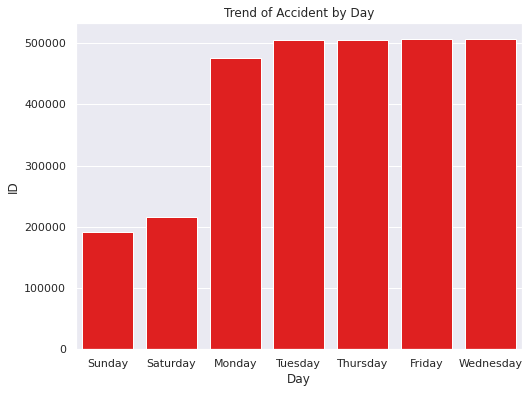

In [ ]:

plt.figure(figsize=(8,6))
sns.barplot(data=accidents_by_day, x='Day', y='ID', color="red")
plt.title("Trend of Accident by Day")

plt.show()

Between 2016 and 2020, there is a large number of accidents during weekdays (Monday to Thursday). On the contrary, there are relatively fewer accidents on weekends (Saturday, and Sunday). During the weekends people stay at home. It shows that Friday, there were high number of accodents, it might be probably people having fun forthe weeknd and going to clubs and bar


**Now, Let's move to the categorical data**

In [ ]:
Categorical_DataFrame.head(3)


,ID,Side,State,Timezone,Wind_Direction,Weather_Condition,Severity,Sunrise_Sunset
0,A-1,R,SC,US/Eastern,N,Fair,2,Day
1,A-2,R,NC,US/Eastern,VAR,Cloudy,2,Day
2,A-3,R,CA,US/Pacific,W,Fair,2,Night


Changing the datatypes to Category

In [ ]:
Categorical_DataFrame['Side'] = Categorical_DataFrame.Side.astype('category')
Categorical_DataFrame['State'] = Categorical_DataFrame.State.astype('category')
Categorical_DataFrame['Timezone'] = Categorical_DataFrame.Timezone.astype('category')
Categorical_DataFrame['Wind_Direction'] = Categorical_DataFrame.Wind_Direction.astype('category')
Categorical_DataFrame['Weather_Condition'] = Categorical_DataFrame.Weather_Condition.astype('category')
Categorical_DataFrame['Severity'] = Categorical_DataFrame.Severity.astype('category')
Categorical_DataFrame['Sunrise_Sunset'] = Categorical_DataFrame.Sunrise_Sunset.astype('category')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Categorical_DataFrame.dtypes

ID                     object
Side                 category
State                category
Timezone             category
Wind_Direction       category
Weather_Condition    category
Severity             category
Sunrise_Sunset       category
dtype: object

From our earlier code, We kno we need to replace (" ") as NAN  for Side coliumn

In [ ]:
Categorical_DataFrame.Side.unique()

['R', 'L', ' ']
Categories (3, object): ['R', 'L', ' ']

In [ ]:
#replacing
Categorical_DataFrame.Side.replace(' ', np.nan, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#To check if there is a missing dat in Categorical Dataframe.
Categorical_DataFrame.isnull().any().values

array([False,  True, False,  True,  True,  True, False,  True])

From the above code, we have some missing data in the categorical data. We have to find a method to fill in the missing data before analyzing

In [ ]:
# USING MODE TO FILL IN THE MISIING DATA.
Categorical_DataFrame = Categorical_DataFrame.fillna(Categorical_DataFrame.mode().iloc[0])

In [ ]:
#TO CHECK IF THERE IS STILL MISSING DATA IN THE DATAFRAME AFTER FILLING IN WITH THE MODE
Categorical_DataFrame.isnull().values.any()

False

From the above code, we can see we don't have any missing data. We can start drawing our insight now.


In [ ]:
Categorical_DataFrame.head(2)

,ID,Side,State,Timezone,Wind_Direction,Weather_Condition,Severity,Sunrise_Sunset
0,A-1,R,SC,US/Eastern,N,Fair,2,Day
1,A-2,R,NC,US/Eastern,VAR,Cloudy,2,Day


Timezone by Accident

In [ ]:
accidents_by_Timezone = pd.DataFrame(Categorical_DataFrame.groupby("Timezone")["ID"].count()).sort_values(by="ID", ascending=True)



accidents_by_Timezone.reset_index(inplace=True)


In [ ]:
accidents_by_Timezone

,Timezone,ID
0,US/Mountain,166823
1,US/Central,631219
2,US/Pacific,888512
3,US/Eastern,1220056


In [ ]:
accidents_by_Timezone["Percentage %"] = round((accidents_by_Timezone["ID"]/accidents_by_Timezone['ID'].sum()) * 100, 2)



In [ ]:
accidents_by_Timezone

,Timezone,ID,Percentage %
0,US/Mountain,166823,5.74
1,US/Central,631219,21.72
2,US/Pacific,888512,30.57
3,US/Eastern,1220056,41.98


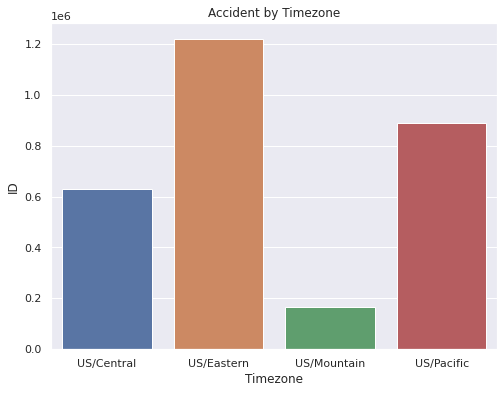

In [ ]:

plt.figure(figsize=(8,6))
sns.barplot(data=accidents_by_Timezone, x='Timezone', y='ID')
plt.title("Accident by Timezone")

plt.show()

From the chart above, We can seee that most numbers of accidents that took place in regions with timezone are Eastern Standard Time followed by Pacific Standard Time.



Accident on the Left & Right Side of the Road.

In [ ]:
accidents_by_side = pd.DataFrame(Categorical_DataFrame.groupby('Side')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_side.reset_index(inplace=True)

accidents_by_side['Percentage %'] = round((accidents_by_side['ID']/accidents_by_side['ID'].sum()) * 100,2)

In [ ]:
accidents_by_side

,Side,ID,Percentage %
0,R,2409663,82.9
1,L,496947,17.1


In [ ]:
# accidents_by_side.to_list
# plt.figure(figsize=(6,6))
# sns.barplot(data=accidents_by_side, x='Side', y='ID')
# plt.title("Accident by Side")

# plt.show()

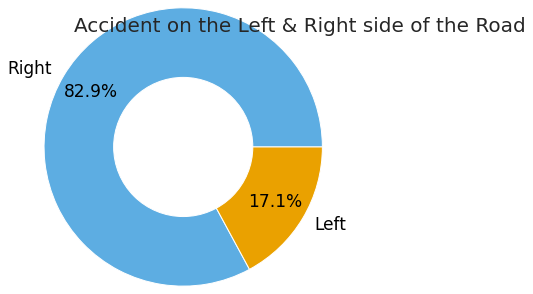

In [ ]:
side_percentage = accidents_by_side["Percentage %"].to_list()
plt.title('Accident on the Left & Right side of the Road', fontsize=20, loc='Left')
plt.pie(side_percentage, colors=['#5DADE2', '#EAA100'], labels= ["Right", "Left"], radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
# "#5B92EE", "#EAA100"

From the dougnurt chart above, most accidents occured on the Right  side of the road than the  left.

State with the highest number of acciidents

In [ ]:
accidents_by_states = pd.DataFrame(Categorical_DataFrame.groupby('State')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_states.reset_index(inplace=True)
accidents_by_states['Percentage %'] = round((accidents_by_states['ID']/accidents_by_states['ID'].sum()) *100,2)

In [ ]:
 Top_10 = accidents_by_states.head(10)
 Top_10


,State,ID,Percentage %
0,CA,730744,25.14
1,FL,263300,9.06
2,TX,226640,7.80
3,NY,126176,4.34
4,NC,122797,4.22
5,SC,120462,4.14
6,OR,98352,3.38
7,PA,89745,3.09
8,VA,89730,3.09
9,MN,79712,2.74


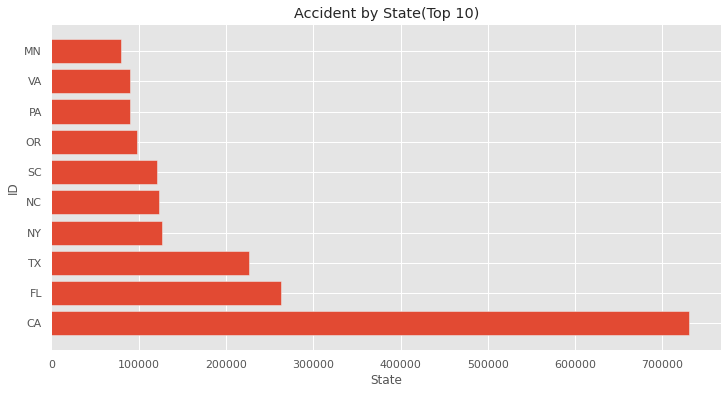

In [ ]:
# Product = ['Computer','Monitor','Laptop','Printer','Tablet']
# Quantity = [320,450,300,120,280]
id_list = Top_10['ID'][:10].to_list()
state_list = Top_10['State'].to_list()

plt.style.use('ggplot')

plt.figure(figsize=(12,6))
plt.barh(state_list, id_list)

plt.title('Accident by State(Top 10)')
plt.ylabel('ID')
plt.xlabel('State')
plt.show()

The plotabove  potrays that Canada(CA) has the highest number of accidents followed by Florida(FL) and Texas(TX).

## Wind Direction

In [ ]:

accidents_by_wind_direction = pd.DataFrame(Categorical_DataFrame.groupby('Wind_Direction')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_wind_direction.reset_index(inplace=True)

accidents_by_wind_direction['Percentage'] = round(accidents_by_wind_direction.ID / accidents_by_wind_direction.ID.sum() * 100, 2)

In [ ]:
Top_10_wd = accidents_by_wind_direction[:10]
Top_10_wd

,Wind_Direction,ID,Percentage
0,CALM,359877,12.38
1,Calm,225941,7.77
2,WNW,142701,4.91
3,SSW,140728,4.84
4,NW,138418,4.76
5,SW,132955,4.57
6,WSW,131533,4.53
7,SSE,130509,4.49
8,NNW,124828,4.29
9,S,110587,3.80


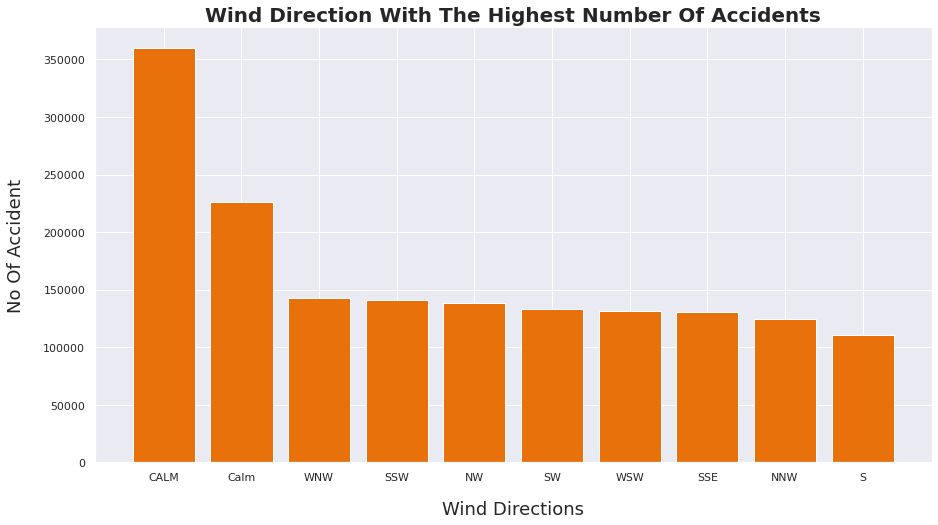

In [ ]:
id_list = Top_10_wd.ID.to_list()
wind_list = Top_10_wd.Wind_Direction.to_list()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.bar(wind_list, id_list, width = 0.8, color = "#E8710B")
plt.xlabel("Wind Directions", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("No Of Accident", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Wind Direction With The Highest Number Of Accidents", fontdict= {"fontsize" : 20, "fontweight" : "bold"})


plt.show()

From the chart above, It shows that the direction of the wind was calm, which means that wind direction does not paly a major role in the accidents.

From the charts above, It shows the wind direction doesn't causes the high number of accidents.

### Weather Condition

In [ ]:

accidents_by_weather_condition = pd.DataFrame(Categorical_DataFrame.groupby('Weather_Condition')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_weather_condition.reset_index(inplace=True)

accidents_by_weather_condition['Percentage'] = round(accidents_by_weather_condition.ID / accidents_by_weather_condition.ID.sum() * 100, 2)

In [ ]:
Top_10_WC = accidents_by_weather_condition[:10]
Top_10_WC

                                  

,Weather_Condition,ID,Percentage
0,Fair,764531,26.30
1,Clear,498925,17.17
2,Mostly Cloudy,386122,13.28
3,Partly Cloudy,268851,9.25
4,Cloudy,245054,8.43
5,Overcast,237068,8.16
6,Light Rain,140946,4.85
7,Scattered Clouds,127090,4.37
8,Light Snow,39941,1.37
9,Fog,33424,1.15


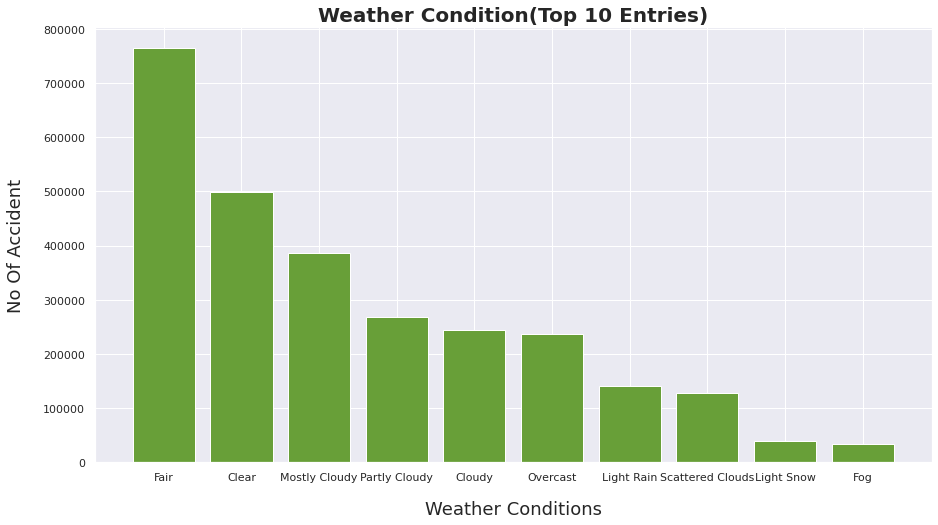

In [ ]:
id_list = Top_10_WC.ID.to_list()
weather_list = Top_10_WC.Weather_Condition.to_list()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.bar(weather_list, id_list, width = 0.8, color = "#689F38")

plt.xlabel("Weather Conditions", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("No Of Accident", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Weather Condition(Top 10 Entries)", fontdict= {"fontsize" : 20, "fontweight" : "bold"})


plt.show()


From the above chart, The plot shows that the weather condition for most of the accidents was Fair, folowed by Clear, and Most Cloudy. Most Cloudy may be a reasonable factors for accidents unlike clear and fair, which means that weather conditions also does not play a major role.

Severity

In [ ]:
accidents_by_severity = pd.DataFrame(Categorical_DataFrame.groupby('Severity')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_severity.reset_index(inplace=True)

accidents_by_severity['Percentage'] = round(accidents_by_severity.ID / accidents_by_severity.ID.sum() * 100, 2)

In [ ]:
accidents_by_severity

,Severity,ID,Percentage
0,2,2129263,73.26
1,3,629452,21.66
2,4,119144,4.10
3,1,28751,0.99


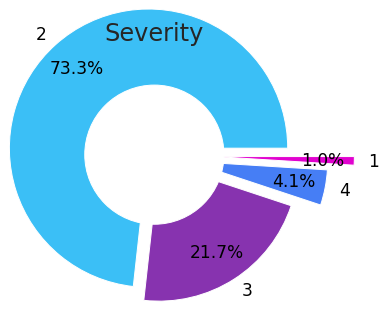

In [ ]:
severity_percentage = accidents_by_severity["Percentage"].to_list()
plt.title('Severity', fontsize=24, loc='Center')
plt.pie(severity_percentage, colors=['#3BBFF6', '#8733AF', '#467EF5','#E102CF'], labels= ["2","3","4","1"], radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.10, 0.10, 0.4, 0.7])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## **Severity indicate the impact of the accident**

The above plot shows that mostly the accidents had severity equal to 2(average) followed by 3(above average), which is unfortunate. There are hardly any accidents with very low severity(1).

Sunrise_Set


Accident that happened during the day and night

In [ ]:
accidents_by_sunrise_set = pd.DataFrame(Categorical_DataFrame.groupby('Sunrise_Sunset')['ID'].count()).sort_values(by="ID", ascending=False)
accidents_by_sunrise_set.reset_index(inplace=True)

accidents_by_sunrise_set['Percentage'] = round(accidents_by_sunrise_set.ID / accidents_by_sunrise_set.ID.sum() * 100, 2)

In [ ]:
accidents_by_sunrise_set

,Sunrise_Sunset,ID,Percentage
0,Day,1941178,66.78
1,Night,965432,33.22


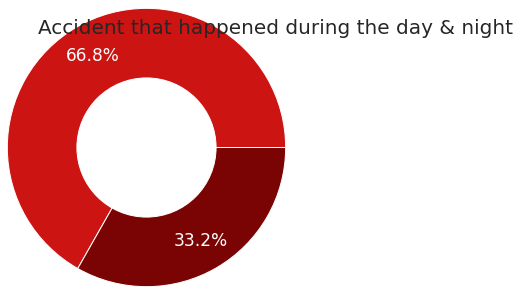

In [ ]:
sunset_percentage = accidents_by_sunrise_set["Percentage"].to_list()
plt.title('Accident that happened during the day & night', fontsize=20, loc='Left')
plt.pie(sunset_percentage, colors=['#CC1413', '#7A0404'], labels= ["Day", "Night"], radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#FFF"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

From the above plot, It shows most accidents occured during the day. This is as a result that the road is always busy during the day.

**Now, to the numerical dataframe**

In [27]:
number_DataFrame.head(3)

,ID,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,34.808868,-82.269157,34.808868,-82.269157,0.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,A-2,35.090080,-80.745560,35.090080,-80.745560,0.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0
2,A-3,37.145730,-121.985052,37.165850,-121.988062,1.4,51.0,51.0,80.0,30.17,10.0,6.0,0.0


### **Observation**



*  We have to check for misiing data.

*   If there is any mising data, check for the percentage of the mising data. If  the missing data for each column is more than 50%, we have to drop.  Otherwise, we fill it in with any method of our choice.
*   We have to check for the correlation, if two features are highly positive correlated absolutely, we can drop one of it. 


*   Drop any column we don't neccesary need.



In [28]:
number_DataFrame.isnull().any()

ID                   False
Start_Lat            False
Start_Lng            False
End_Lat               True
End_Lng               True
Distance(mi)         False
Temperature(F)        True
Wind_Chill(F)         True
Humidity(%)           True
Pressure(in)          True
Visibility(mi)        True
Wind_Speed(mph)       True
Precipitation(in)     True
dtype: bool

From the above code, we can see there are missing data. Let's check for the perecentage to know which features to drop or fill.

In [29]:
percentage_missing = pd.DataFrame({"Percentage": round(number_DataFrame.isnull().sum()/len(number_DataFrame.index) * 100, 2
)})

In [30]:
percentage_missing

,Percentage
ID,0.00
Start_Lat,0.00
Start_Lng,0.00
End_Lat,9.73
End_Lng,9.73
Distance(mi),0.00
Temperature(F),2.31
Wind_Chill(F),40.73
Humidity(%),2.45
Pressure(in),1.96


From the above table no features is more than 50%. We have to fill in missing data with mean>

In [ ]:
#  numeric = number_DataFrame.fillna(number_DataFrame.mean().iloc[0])

In [ ]:
number_DataFrame.corr(
    
)



### **Observation**
*   We can see that Start Lat & End Lat are highly positive correlated. I'II be dropping one of it

*   Also, Start Lng & End lng are highly positive correlated. 
*   Likewise Temperature & WindChill are highly positive correlated too. 


*   List item



## **Dropping Columns**

In [32]:
number_DataFrame_d = number_DataFrame.drop(columns=["End_Lat", "End_Lng","Wind_Chill(F)"])

In [33]:
number_DataFrame_d.head(3
                        )

,ID,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,34.808868,-82.269157,0.0,76.0,52.0,28.91,10.0,7.0,0.0
1,A-2,35.090080,-80.745560,0.0,76.0,62.0,29.30,10.0,3.0,0.0
2,A-3,37.145730,-121.985052,1.4,51.0,80.0,30.17,10.0,6.0,0.0


In [35]:
number_DataFrame_d.columns

Index(['ID', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [ ]:
#FILLING OF MISSING DATA
number_DataFrame_d.fillna(number_DataFrame_d.Start_Lat.mean(), inplace=True)
number_DataFrame_d.fillna(number_DataFrame_d.Start_Lng.mean(), inplace=True)
number_DataFrame_d.fillna(number_DataFrame_d["Temperature(F)"].mean(), inplace=True)
number_DataFrame_d

In [39]:
number_DataFrame_d[["Start_Lat", "Start_Lng", "Temperature(F)"]].isnull().values.any()

False

From the above code, the three features doen't have mising data again.


Now, I can analyze the three features to draw insight>

### **DISTANCE**

In [133]:
#TO CHECK THE MAXIMUM DISTANCE
number_DataFrame["Distance(mi)"].max()

333.63000488299997

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


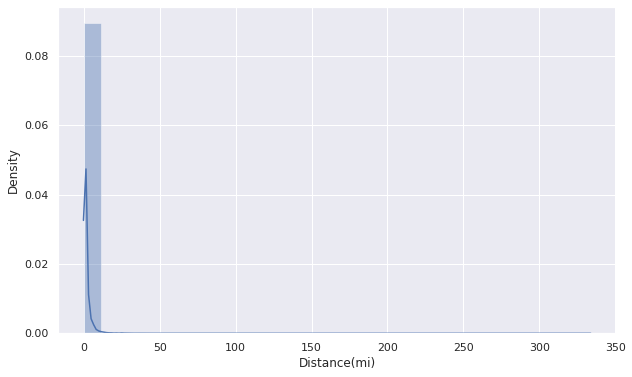

In [134]:
plt.figure(figsize=(10,6))
sns.distplot(a=number_DataFrame['Distance(mi)'], bins=30)
plt.show()


Most accident occured in short distance. The above graph is skewed to the right.

### **SCATTER PLOT**
The Start_Lat and Start_Lng features are interesting since 
they can be plotted on a map, to get the exact location of 
the accident. First, I will draw a scatterplot between the two.

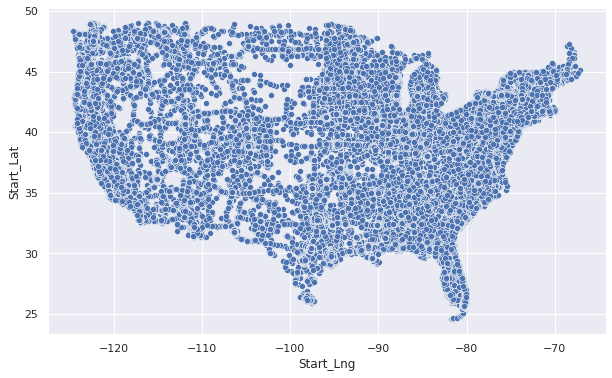

In [40]:

plt.figure(figsize=(10,6))
sns.scatterplot(x=number_DataFrame_d.Start_Lng, y=number_DataFrame_d.Start_Lat)
plt.show()

From the above plot, it is alarming that almost every corner
of the USA is covered, meaning that the accidents occurred 
over a large number of locations.

### **Temperature**

In [43]:
temp_df = number_DataFrame[['ID','Temperature(F)']]
temp_df.head(2)

,ID,Temperature(F)
0,A-1,76.0
1,A-2,76.0


In [48]:
#to find the lowest degree of the temperature
temp_df["Temperature(F)"].min()

-89.0

In [49]:
#to find the highest degree of the temperature in temp_df
temp_df["Temperature(F)"].max()


203.0

I will divide the temperature into five category:


*   Extremely Cold

*   Cold
*   Warm


*   Hot


*   Extremely Hot






In [85]:
#The function to divide it.

def get_group(T, low = -89.0, High= 202.0):
  if T >= low  and  T < 32:
    return "Extremely Cold"
  elif T >= 32 and T < 59:
    return "Cold"
  elif T >= 59 and T < 79:
    return "Warm"

  elif T >= 79 and T < 99:
    return "Hot"
  else:
    return "Extremely  Hot"





In [86]:
#Applying the function

temp_df["Group"] = temp_df["Temperature(F)"].apply(get_group)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
temp_df.head(7)

,ID,Temperature(F),Group
0,A-1,76.0,Warm
1,A-2,76.0,Warm
2,A-3,51.0,Cold
3,A-4,53.6,Cold
4,A-5,84.2,Hot
5,A-6,73.4,Warm
6,A-7,28.0,Extremely Cold


In [90]:
#I want to group it so that i can visualize
temp_df_G = pd.DataFrame(temp_df.groupby('Group')['ID'].count()).sort_values(by="ID", ascending= False)
temp_df_G.reset_index(inplace=True)

In [91]:
temp_df_G["Percentage"] = round(temp_df_G.ID/temp_df_G.ID.sum() * 100, 2)

In [92]:
temp_df_G


,Group,ID,Percentage
0,Warm,1140892,39.25
1,Cold,999478,34.39
2,Hot,493995,17.00
3,Extremely Cold,190551,6.56
4,Extremely Hot,81694,2.81


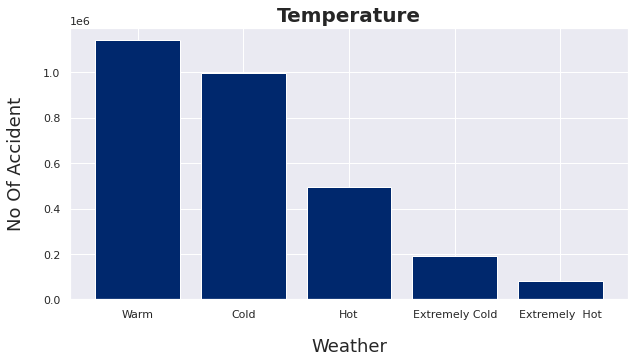

In [101]:
id_list = temp_df_G.ID.to_list()
Group_list = temp_df_G.Group.to_list()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
plt.bar(Group_list, id_list, width = 0.8, color = "#00286D")

plt.xlabel("Weather", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("No Of Accident", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Temperature", fontdict= {"fontsize" : 20, "fontweight" : "bold"})


plt.show()



Most Accident occurs whenever the weather is cold and warm. 
This means that people are likely to stay indoor when is extremely hot and cold.


### BOOLEAN

In [103]:
bool_DataFrame.head(3)

,ID,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,A-1,False,False,False,False,False,False,False,False,False,False,False,False
1,A-2,False,False,False,False,False,False,False,False,False,False,False,False
2,A-3,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
bool_DataFrame.corr()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Amenity,1.000000,0.004188,0.121591,0.006664,-0.027331,0.012471,0.048310,0.000699,0.169276,0.032189,0.024798,0.102440
Bump,0.004188,1.000000,0.009828,-0.000752,-0.000083,0.029617,0.002809,-0.000099,0.002872,0.014530,0.665499,-0.004257
Crossing,0.121591,0.009828,1.000000,0.063578,-0.083039,0.049284,0.223063,0.000057,0.119229,0.067607,0.024631,0.455875
Give_Way,0.006664,-0.000752,0.063578,1.000000,-0.009828,0.011582,0.001631,-0.000372,-0.000963,0.041432,0.001315,0.057462
Junction,-0.027331,-0.000083,-0.083039,-0.009828,1.000000,-0.003624,-0.011440,0.016036,-0.033703,-0.030959,-0.001281,-0.128115
No_Exit,0.012471,0.029617,0.049284,0.011582,-0.003624,1.000000,0.007798,-0.000255,0.016847,0.012694,0.020622,0.024314
Railway,0.048310,0.002809,0.223063,0.001631,-0.011440,0.007798,1.000000,-0.000663,0.144320,0.007596,0.001267,0.057128
Roundabout,0.000699,-0.000099,0.000057,-0.000372,0.016036,-0.000255,-0.000663,1.000000,-0.000292,0.003086,0.013783,-0.003006
Station,0.169276,0.002872,0.119229,-0.000963,-0.033703,0.016847,0.144320,-0.000292,1.000000,0.021539,0.009286,0.122166
Stop,0.032189,0.014530,0.067607,0.041432,-0.030959,0.012694,0.007596,0.003086,0.021539,1.000000,0.015507,-0.040345


### **Observation**

*   Presence of traffic  signal in a nearby location will result to high number of people crossing or Give way.  A  traffic signal will show peedsterian crosiing

*  


In [104]:
bool_DataFrame.isnull().values.any()

False

From the above code, it shows that there is no missing data in the dataframe.

In [112]:
#Grouping the bump
bump_df = pd.DataFrame(bool_DataFrame.groupby("Bump")["ID"].count())
bump_df.reset_index(inplace=True)
bump_df.head(3)

,Bump,ID
0,False,2906031
1,True,579


In [125]:
bump_df["Percentage"] = round(bump_df.ID/bump_df.ID.sum() * 100, 4)

In [126]:
bump_df.head(3)

,Bump,ID,Percentage
0,False,2906031,99.9801
1,True,579,0.0199


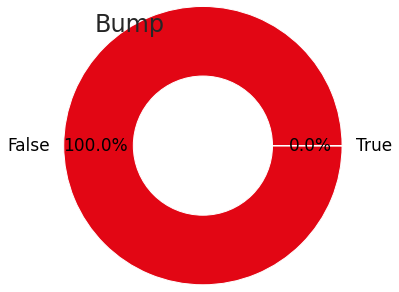

In [131]:
bump_percentage = bump_df["Percentage"].to_list()
plt.title('Bump', fontsize=24, loc='Left')
plt.pie(bump_percentage, colors=['#E20614','#FFCE00',], labels= ["False", "True"], radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

From the chart above,  we  see the accident is not caused by Bump. We see that 99.99% of the accidents were not due to a speed bump

In [135]:
# Execute this to save new versions of the notebook
jovian.commit(project="EDA OF US ACCIDENTS")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/temitopeyakub28/eda-of-us-accidents


'https://jovian.ai/temitopeyakub28/eda-of-us-accidents'